<a href="https://colab.research.google.com/github/monjar/AI-Assignments/blob/master/RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras-rl2
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet
!pip install gym[classic_control]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 2.5 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 780 kB of archives.
After this operation, 2,271 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 xvfb amd64 2:1.20.13-1ubuntu1~20.04.6 [780 kB]
Fetched 780 kB in 1s (1,201 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 128048 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.20.13-1ubuntu1~20.04.6_amd64.deb ...
Unpacking xvfb (2:1.20.13-1ubun

In [2]:
from pyvirtualdisplay import Display
display = Display(visible = 0, size=(1400, 900))
display.start()
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
import numpy as np
import gym
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory
import tensorflow.keras

def show_state(env, step=0, info=""):
  plt.figure(3)
  plt.clf()
  plt.imshow(env.render(mode='rgb_array'))
  plt.title("Step: %d %s" %(step, info))
  plt.axis('off')
  display.clear_output(wait = True)
  display.display(plt.gcf())




In [3]:
ENV_NAME = 'CartPole-v0'
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

/usr/local/lib/python3.8/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` inste

In [4]:


model = Sequential()
model.add(Flatten(input_shape = (1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
shape_test =  (1,) + env.observation_space.shape

In [5]:
memory = SequentialMemory(limit = 50000, window_length = 1)
policy = BoltzmannQPolicy()
dqn = DQNAgent(model = model,
               nb_actions = nb_actions,
               memory = memory,
               nb_steps_warmup=10,
               target_model_update=1e-2,
               policy = policy)

dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=1000, visualize=True, verbose=2)
dqn.save_weights(f"dqn_{ENV_NAME}_weights.h5f", overwrite=True)

dqn.test(env, nb_episodes=5, visualize=True)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Training for 1000 steps ...


/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/usr/local/lib/python3.8/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  

  18/1000: episode: 1, duration: 4.049s, episode steps:  18, steps per second:   4, episode reward: 18.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.556 [0.000, 1.000],  loss: 0.597822, mae: 0.595980, mean_q: -0.041715


/usr/local/lib/python3.8/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 23 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.8/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 24 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.8/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 25 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.8/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 26 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.8/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 27 + 1) instead
  batch_idxs

  39/1000: episode: 2, duration: 0.425s, episode steps:  21, steps per second:  49, episode reward: 21.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.667 [0.000, 1.000],  loss: 0.494348, mae: 0.528026, mean_q: -0.001910


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  58/1000: episode: 3, duration: 0.382s, episode steps:  19, steps per second:  50, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.632 [0.000, 1.000],  loss: 0.342146, mae: 0.476793, mean_q: 0.137309


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  78/1000: episode: 4, duration: 0.408s, episode steps:  20, steps per second:  49, episode reward: 20.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.550 [0.000, 1.000],  loss: 0.175931, mae: 0.487902, mean_q: 0.409639


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  93/1000: episode: 5, duration: 0.303s, episode steps:  15, steps per second:  49, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.400 [0.000, 1.000],  loss: 0.064193, mae: 0.533522, mean_q: 0.787780


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 106/1000: episode: 6, duration: 0.262s, episode steps:  13, steps per second:  50, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.692 [0.000, 1.000],  loss: 0.041022, mae: 0.613537, mean_q: 1.003834


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 124/1000: episode: 7, duration: 0.361s, episode steps:  18, steps per second:  50, episode reward: 18.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.667 [0.000, 1.000],  loss: 0.028026, mae: 0.655615, mean_q: 1.125733


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 169/1000: episode: 8, duration: 0.901s, episode steps:  45, steps per second:  50, episode reward: 45.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.489 [0.000, 1.000],  loss: 0.022845, mae: 0.745519, mean_q: 1.346589


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 191/1000: episode: 9, duration: 0.455s, episode steps:  22, steps per second:  48, episode reward: 22.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.682 [0.000, 1.000],  loss: 0.024702, mae: 0.875058, mean_q: 1.634414


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 210/1000: episode: 10, duration: 0.392s, episode steps:  19, steps per second:  49, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.368 [0.000, 1.000],  loss: 0.021742, mae: 0.927683, mean_q: 1.779252


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 239/1000: episode: 11, duration: 0.595s, episode steps:  29, steps per second:  49, episode reward: 29.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.621 [0.000, 1.000],  loss: 0.034358, mae: 1.019879, mean_q: 1.937771


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 259/1000: episode: 12, duration: 0.422s, episode steps:  20, steps per second:  47, episode reward: 20.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 0.024437, mae: 1.116693, mean_q: 2.153690


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 303/1000: episode: 13, duration: 0.890s, episode steps:  44, steps per second:  49, episode reward: 44.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 0.035635, mae: 1.225244, mean_q: 2.351594


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 326/1000: episode: 14, duration: 0.461s, episode steps:  23, steps per second:  50, episode reward: 23.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.565 [0.000, 1.000],  loss: 0.056122, mae: 1.377212, mean_q: 2.619518


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 343/1000: episode: 15, duration: 0.346s, episode steps:  17, steps per second:  49, episode reward: 17.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.412 [0.000, 1.000],  loss: 0.044477, mae: 1.432236, mean_q: 2.743109


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 388/1000: episode: 16, duration: 0.908s, episode steps:  45, steps per second:  50, episode reward: 45.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.556 [0.000, 1.000],  loss: 0.073123, mae: 1.574922, mean_q: 3.014474


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 408/1000: episode: 17, duration: 0.403s, episode steps:  20, steps per second:  50, episode reward: 20.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.600 [0.000, 1.000],  loss: 0.064355, mae: 1.700686, mean_q: 3.286235
 418/1000: episode: 18, duration: 0.200s, episode steps:  10, steps per second:  50, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.800 [0.000, 1.000],  loss: 0.077372, mae: 1.763391, mean_q: 3.391302


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 461/1000: episode: 19, duration: 0.866s, episode steps:  43, steps per second:  50, episode reward: 43.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.535 [0.000, 1.000],  loss: 0.093074, mae: 1.874766, mean_q: 3.572950


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 496/1000: episode: 20, duration: 0.715s, episode steps:  35, steps per second:  49, episode reward: 35.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.543 [0.000, 1.000],  loss: 0.106103, mae: 2.019073, mean_q: 3.874912


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 512/1000: episode: 21, duration: 0.331s, episode steps:  16, steps per second:  48, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.625 [0.000, 1.000],  loss: 0.123042, mae: 2.121719, mean_q: 4.074669


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 530/1000: episode: 22, duration: 0.383s, episode steps:  18, steps per second:  47, episode reward: 18.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.389 [0.000, 1.000],  loss: 0.110624, mae: 2.209471, mean_q: 4.218344


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 543/1000: episode: 23, duration: 0.271s, episode steps:  13, steps per second:  48, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.692 [0.000, 1.000],  loss: 0.139099, mae: 2.250483, mean_q: 4.310860


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 564/1000: episode: 24, duration: 0.434s, episode steps:  21, steps per second:  48, episode reward: 21.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.381 [0.000, 1.000],  loss: 0.195348, mae: 2.318882, mean_q: 4.375968


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 576/1000: episode: 25, duration: 0.244s, episode steps:  12, steps per second:  49, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.167 [0.000, 1.000],  loss: 0.120378, mae: 2.399586, mean_q: 4.612854


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 612/1000: episode: 26, duration: 0.722s, episode steps:  36, steps per second:  50, episode reward: 36.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.583 [0.000, 1.000],  loss: 0.171543, mae: 2.475746, mean_q: 4.738017


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 651/1000: episode: 27, duration: 0.782s, episode steps:  39, steps per second:  50, episode reward: 39.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.487 [0.000, 1.000],  loss: 0.216662, mae: 2.631906, mean_q: 5.025276


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 686/1000: episode: 28, duration: 0.704s, episode steps:  35, steps per second:  50, episode reward: 35.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.486 [0.000, 1.000],  loss: 0.227705, mae: 2.763427, mean_q: 5.329929


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 709/1000: episode: 29, duration: 0.464s, episode steps:  23, steps per second:  50, episode reward: 23.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.435 [0.000, 1.000],  loss: 0.252027, mae: 2.890794, mean_q: 5.592086


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 724/1000: episode: 30, duration: 0.309s, episode steps:  15, steps per second:  49, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.400 [0.000, 1.000],  loss: 0.252334, mae: 2.973075, mean_q: 5.800781


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 743/1000: episode: 31, duration: 0.384s, episode steps:  19, steps per second:  50, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.526 [0.000, 1.000],  loss: 0.259121, mae: 3.037703, mean_q: 5.899030


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 770/1000: episode: 32, duration: 0.544s, episode steps:  27, steps per second:  50, episode reward: 27.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.370 [0.000, 1.000],  loss: 0.266631, mae: 3.126997, mean_q: 6.086401


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 839/1000: episode: 33, duration: 1.392s, episode steps:  69, steps per second:  50, episode reward: 69.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.507 [0.000, 1.000],  loss: 0.285835, mae: 3.325122, mean_q: 6.491147
 848/1000: episode: 34, duration: 0.191s, episode steps:   9, steps per second:  47, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.111 [0.000, 1.000],  loss: 0.239669, mae: 3.452173, mean_q: 6.850733


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 861/1000: episode: 35, duration: 0.271s, episode steps:  13, steps per second:  48, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.538 [0.000, 1.000],  loss: 0.252249, mae: 3.514394, mean_q: 6.971290


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 876/1000: episode: 36, duration: 0.311s, episode steps:  15, steps per second:  48, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.467 [0.000, 1.000],  loss: 0.394369, mae: 3.563089, mean_q: 6.994191


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 928/1000: episode: 37, duration: 1.060s, episode steps:  52, steps per second:  49, episode reward: 52.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.519 [0.000, 1.000],  loss: 0.389972, mae: 3.753731, mean_q: 7.355930


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 963/1000: episode: 38, duration: 0.704s, episode steps:  35, steps per second:  50, episode reward: 35.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.514 [0.000, 1.000],  loss: 0.371787, mae: 3.949520, mean_q: 7.781534


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 989/1000: episode: 39, duration: 0.523s, episode steps:  26, steps per second:  50, episode reward: 26.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.462 [0.000, 1.000],  loss: 0.386478, mae: 4.075056, mean_q: 8.041327


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


done, took 24.015 seconds
Testing for 5 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200


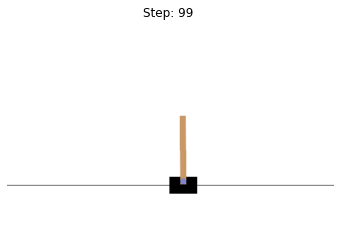

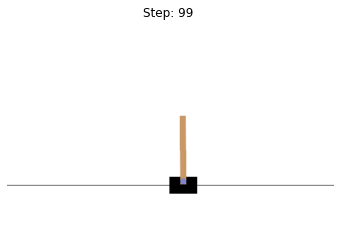

In [6]:
for i in range(100):
  show_state(env, i, info="")